In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import os


In [4]:
# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\s1+s2\miny' 
# # file_path_1 = os.path.join(folder_path, 'rdm_bo_miny.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
# # df_1 = pd.read_excel(file_path_1)
# # file_path_2 = os.path.join(folder_path, 'rdm_bo1_miny.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
# # df_2 = pd.read_excel(file_path_2)
# # file_name = 'rdm_bo'

# file_path_1 = os.path.join(folder_path, 'RDM50_EI1000_miny.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
# df_1 = pd.read_excel(file_path_1)
# file_path_2 = os.path.join(folder_path, 'RDM50_EI1001_miny.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
# df_2 = pd.read_excel(file_path_2)


# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Aryl\aryl15\miny'  

# file_path_1 = os.path.join(folder_path, 'SE20_EI60_cor_miny.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
# df_1 = pd.read_excel(file_path_1)
# file_path_2 = os.path.join(folder_path, 'SE20_EI60-2_miny.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
# df_2 = pd.read_excel(file_path_2)

# folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\ti\original_data\predict'  
# file_path_1 = os.path.join(folder_path, 'SE_1_spearman.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
# df_1 = pd.read_excel(file_path_1)
# file_path_2 = os.path.join(folder_path, 'SE_spearman.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
# df_2 = pd.read_excel(file_path_2)

# file_name = 'SE_cor_spearman'


# print(df_1.shape)
# print(df_2.shape)

In [6]:
folder_path = r'C:\Users\13282\Desktop\papercode\two_stage\result\Alloy\s1\original\miny'  
file_path_1 = os.path.join(folder_path, 'SE50_EI300_miny.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
df_1 = pd.read_excel(file_path_1)
file_path_2 = os.path.join(folder_path, 'SE50_EI300_1_miny.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
df_2 = pd.read_excel(file_path_2)

file_name = 'SE50_EI300_cor_miny'
print(df_1.shape)
print(df_2.shape)

(40, 30)
(40, 30)


In [7]:
merged_df = pd.concat([df_1, df_2], axis=0)
print(merged_df.shape)

(80, 30)


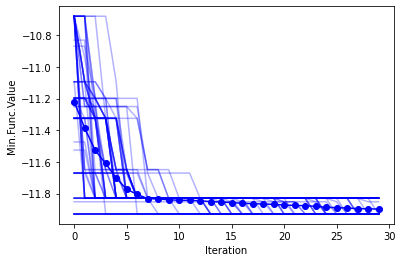

In [8]:
df_min_y = merged_df

mean_data = df_min_y.mean()

# y_min = np.nanmin(Y_all)

# 定义透明度参数
alpha_increment = 0.3 / len(df_min_y)

for i, (index, row) in enumerate(df_min_y.iterrows()):

    # 计算当前透明度
#     alpha = 0.1 + alpha_increment * (i + 1)
    alpha = 0.3
    # 绘制折线图，并设置颜色和透明度
    plt.plot(row.index, row.values, color='blue', alpha=alpha)
    
    
plt.plot(mean_data.index, mean_data.values,  marker='o', linestyle='-', color='blue')

# plt.axhline(y_min, color='black', linestyle=':', linewidth=5,)
# 添加图例
# plt.legend()

plt.xlabel('Iteration')
plt.ylabel('Min.Func.Value')

# 显示图形
plt.show()

In [9]:
sorted_df = merged_df.sort_values(by=merged_df.columns[-1], ascending=False)
# 选择数值最大的40行
top_40_df = sorted_df.head(40)


sorted_df = merged_df.sort_values(by=merged_df.columns[-1], ascending=True)
# 选择数值最小的40行
bottom_40_df = sorted_df.head(40)


print(top_40_df.shape)

(40, 30)


# 选择最大还是最小

In [10]:
df_min_y = bottom_40_df

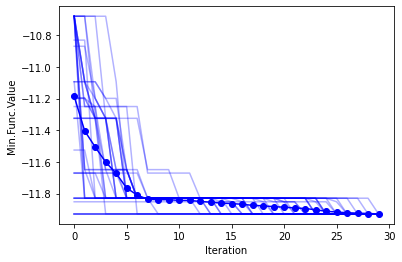

In [11]:


mean_data = df_min_y.mean()

# y_min = np.nanmin(Y_all)

# 定义透明度参数
alpha_increment = 0.3 / len(df_min_y)

for i, (index, row) in enumerate(df_min_y.iterrows()):

    # 计算当前透明度
#     alpha = 0.1 + alpha_increment * (i + 1)
    alpha = 0.3
    # 绘制折线图，并设置颜色和透明度
    plt.plot(row.index, row.values, color='blue', alpha=alpha)
    
    
plt.plot(mean_data.index, mean_data.values,  marker='o', linestyle='-', color='blue')

# plt.axhline(y_min, color='black', linestyle=':', linewidth=5,)
# 添加图例
# plt.legend()

plt.xlabel('Iteration')
plt.ylabel('Min.Func.Value')

# 显示图形
plt.show()

# 保存文件

In [12]:
import os



folder_name = folder_path

# 确保文件夹存在，如果不存在则创建
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# 构建完整的文件路径，包括文件夹名称和文件名
miny_name = os.path.join(folder_name, f'{file_name}.xlsx')
df_min_y.to_excel(miny_name, index=False, engine='openpyxl')

# matminer描述符展示

In [33]:
from matminer.featurizers.composition import ElementProperty
from pymatgen.core import Composition
import pandas as pd

# 定义合金组成
composition = Composition("Fe0.2Co0.3Ni0.5")

# 使用元素属性描述符
ep = ElementProperty.from_preset(preset_name="magpie")

# 生成描述符
features = ep.featurize(composition)

# 将特征名称与其对应的值结合成 DataFrame
feature_names = ep.feature_labels()
feature_data = pd.DataFrame([features], columns=feature_names)

# 显示特征
feature_data


D:\anaconda\lib\site-packages\pkg_resources\__init__.py:116: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(


,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,26.0,28.0,2.0,27.3,0.7,28.0,55.0,61.0,6.0,58.9,...,1.515268,1.184371,0.588977,0.595395,194.0,229.0,35.0,216.5,13.5,225.0
